In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
import numpy as np

In [23]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [25]:
print(train_labels)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [22]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

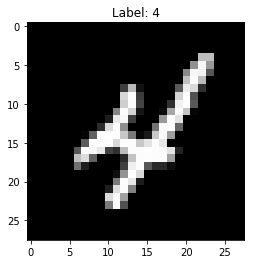

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
index=4
plt.imshow(train_images[index], cmap="gray")
plt.title("Label: {}".format(train_labels[index]))

matplot lib works with colours for viz. cmap="gray" gives you the grayscale that it actually is.

In [ ]:
from keras import models, layers

In [51]:
model= models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [45]:
'''
hyperparameters --> 512 , 10
vector matrix multiplication to get you from the n-1 layer to the n layer

i0    i2    i3
x     x      x
  \/\      /\/     <-on weights
  
  h1     h2        h = W1 oi + b1
   x     x
  
     \/
      O
      x            O =  W2 oh + b2
                   O =  W2 o(W1 oi + b1) + b2     //which means there are no longer hidden layers,
                                                     so you use softmax to force feature extraction on multiple levels
                                                     
                                                     h = relu(W1 oi + b1) 
                                                     o = softmax(W2 oh + b2)
'''

'\nhyperparameters --> 512 , 10\nvector matrix multiplication to get you from the n-1 layer to the n layer\n\n\ni0    i2    i3\nx     x      x\n\n  h1       h2       h = W1 oi \n   x       x\n  \n      O\n      x              O =  W2 oh\n      \n'

In [52]:
model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [53]:
'''
normalise to get bounds,
'''

'\nnormalise to get bounds,\n'

In [55]:
x_input= train_images.reshape((60000, 28 * 28))
print(x_input.shape) 

'''
doesn't change the data still 28* 28 = 784
'''

(60000, 784)


In [60]:


x_train= train_images.reshape((60000, 28 * 28))
x_train = x_train.astype("float32")/ 255.0

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype("float32")/ 255.0

print(x_train.shape) 
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [62]:
from keras.utils import to_categorical


x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype("float32")/ 255.0
y_train = to_categorical(train_labels)

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype("float32")/ 255.0
y_test = to_categorical(test_labels)

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape) 

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [67]:
for index in range(10):
    print(y_test[index], "->", test_labels[index])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> 7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> 2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> 1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> 4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> 1
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> 4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> 9
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] -> 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> 9


##these are probability distributions. 0 = 0% probability, 1= 100% probability
##corresponds to the index in which the 1 is

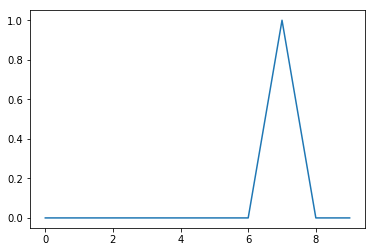

In [80]:
prediction = model.predict(x_test[0:1])[0]
plt.plot(prediction)

In [74]:
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128
)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2527 - acc: 0.9261
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1011 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0666 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0478 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0358 - acc: 0.9895


evaluate against test data now!

In [77]:
model.evaluate(x_test, y_test )

10000/10000 [==============================] - 0s 28us/step


[0.06752123099246528, 0.9798]

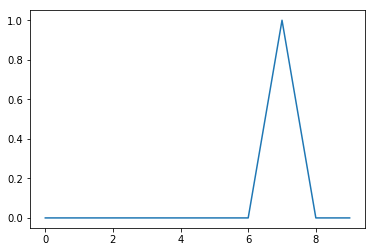

In [81]:
'''
it is now predicted
'''

prediction = model.predict(x_test[0:1])[0]
plt.plot(prediction)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2538 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1035 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0680 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0493 - acc: 0.9847
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step


[0.06743535036167596, 0.979]

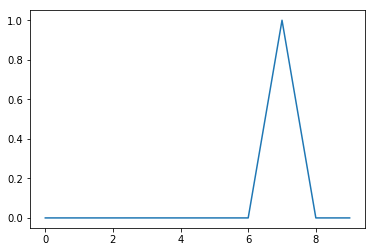

In [91]:
model= models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax"))
model.summary()
model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128
)


prediction = model.predict(x_test[0:1])[0]
plt.plot(prediction)
model.evaluate(x_test, y_test )

In [92]:
model.save("model.h5")

In [94]:
model2 = models.load_model("model.h5")
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [95]:
'''
softmax - all results will be represented from 0 to 1 and that the sum of all results will equal to 1.
layer - activation function, weight and bias


 x 
 |
 W1B1 - Layer  act
 |
 W2B2 - Layer  act
 |
 y_pred       
 -----------------
 + y_true           //metrics for accuracy but only for humans 
 = predict()
 ---------------
 +loss
 = evaluate()
 --------------
 +optimisers  //to minimise loss
 = fit()

'''

'\nsoftmax - all results will be represented from 0 to 1 and that the sum of all results will equal to 1.\nlayer - activation function, weight and bias\n\n\n x \n |\n W1B1 - Layer - act\n |\n W2B2 - Layer - act\n |\n y_pred       \n -----------------\n + y_true           //metrics for accuracy but only for humans \n = predict()\n ---------------\n +loss\n = evaluate()\n --------------\n +optimisers  //to minimise loss\n = fit()\n\n'